First, I compared the prediction models by PyCaret, and found that xgboost is best model, accuracy 0.8935.

Next, I tried to find how I can prevent churn to grow revenue and profit. This time, I found some insight about impact on churn.

* Age 27 to 28 and churn are in positive correlation, it means that younger age people tend to churn.
* Frequent Flight and churn are in positive correlation. It may mean that people who travel often also book for the time being, and have cancel it. I have to take care of people who often travel not to cancel.
* Middle income people and churn are in negative correlation, low income people and churn are in both positive and negative, and high income people and churn are in positive correlation.
* People whose number of times services opted during recent years is 'one' and churn are in negative correlation. On the other hand, 'two' ,'five' and 'six'and churn are in positive correlation.
* Account syncing to social media and churn are both in positive and negative. It means that both side are using social media. 
* People who booked the hotel and churn are in negative correlation. It means that booking the hotel may be deterrence for churn.


As a result, to prevent churn, especially, **I have to take care of** people who are 27 to 28 years old, or/and who have frequent flight or/and two, five or six times services opted during recent years or/and are with high income, or/and who do not book the hotel.

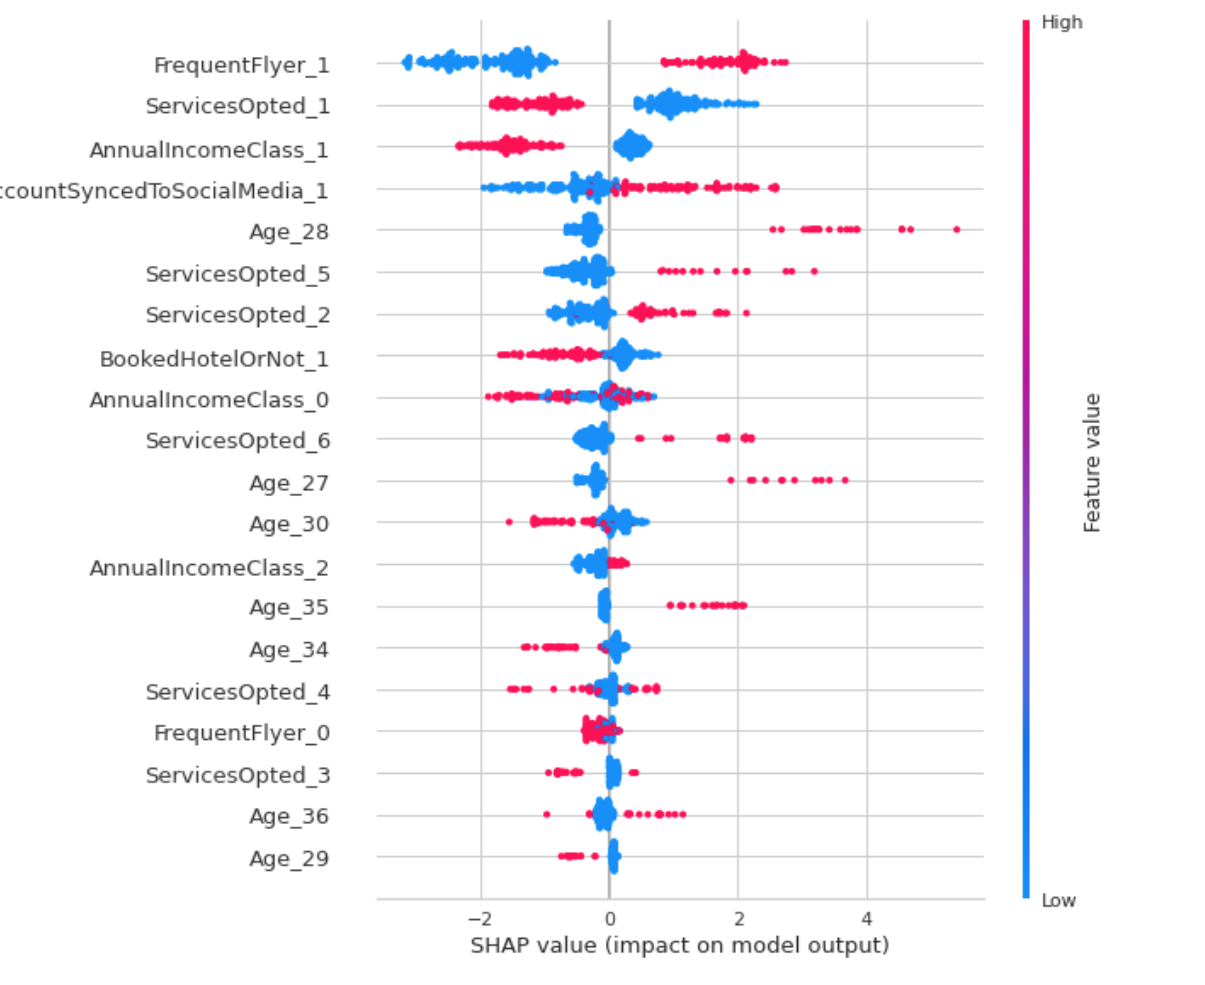

1) Data Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tour-travels-customer-churn-prediction/Customertravel.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/kaggle/input/tour-travels-customer-churn-prediction/Customertravel.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [6]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [7]:
df.groupby('Target').describe()

Age                                                     \
        count       mean       std   min   25%   50%   75%   max   
Target                                                             
0       730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0   
1       224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0   

       ServicesOpted                                               
               count      mean       std  min  25%  50%  75%  max  
Target                                                             
0              730.0  2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1              224.0  2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [8]:
df['AnnualIncomeClass'].unique()

array(['Middle Income', 'Low Income', 'High Income'], dtype=object)

In [9]:
df['FrequentFlyer'].unique()

array(['No', 'Yes', 'No Record'], dtype=object)

In [10]:
cleanup_nums = {'FrequentFlyer': {'No': 0, 'Yes': 1,'No Record':3},
                'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2},
                'AccountSyncedToSocialMedia': {'No':0, 'Yes': 1},
                'BookedHotelOrNot': {'No': 0, 'Yes': 1}}

In [11]:
df1 = df.replace(cleanup_nums)
df1.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,1,6,0,1,0
1,34,1,0,5,1,0,1
2,37,0,1,3,1,0,0
3,30,0,1,2,0,0,0
4,30,0,0,1,0,0,0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         954 non-null    int64
 1   FrequentFlyer               954 non-null    int64
 2   AnnualIncomeClass           954 non-null    int64
 3   ServicesOpted               954 non-null    int64
 4   AccountSyncedToSocialMedia  954 non-null    int64
 5   BookedHotelOrNot            954 non-null    int64
 6   Target                      954 non-null    int64
dtypes: int64(7)
memory usage: 52.3 KB


2) Correlation

<AxesSubplot:>

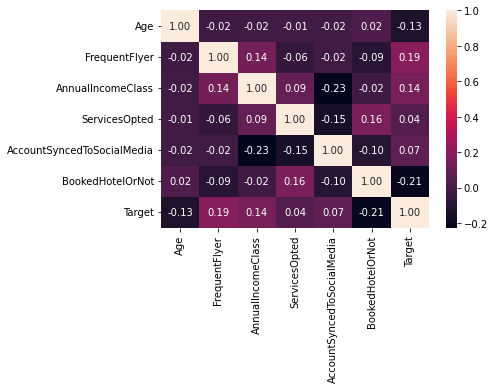

In [13]:
sns.heatmap(df1.corr(),annot=True, fmt='1.2f')

3) The difference between no-churn and churn

In [14]:
df1.groupby('Target').describe().T

Target                                     0           1
Age                        count  730.000000  224.000000
                           mean    32.352055   31.316964
                           std      3.209323    3.620133
                           min     27.000000   27.000000
                           25%     30.000000   28.000000
                           50%     31.000000   30.000000
                           75%     35.000000   35.000000
                           max     38.000000   38.000000
FrequentFlyer              count  730.000000  224.000000
                           mean     0.404110    0.763393
                           std      0.817997    0.629826
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    1.000000
                           75%      1.000000    1.000000
                           max      3.000000    3.000000
AnnualIncomeClass          count  730.000000  224.000000
                           mean     0.705479    0.946429
                           std      0.626001    0.935971
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      1.000000    1.000000
                           75%      1.000000    2.000000
                           max      2.000000    2.000000
ServicesOpted              count  730.000000  224.000000
                           mean     2.402740    2.549107
                           std      1.554495    1.763430
                           min      1.000000    1.000000
                           25%      1.000000    1.000000
                           50%      2.000000    2.000000
                           75%      3.000000    4.000000
                           max      6.000000    6.000000
AccountSyncedToSocialMedia count  730.000000  224.000000
                           mean     0.357534    0.441964
                           std      0.479603    0.497733
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    0.000000
                           75%      1.000000    1.000000
                           max      1.000000    1.000000
BookedHotelOrNot           count  730.000000  224.000000
                           mean     0.452055    0.214286
                           std      0.498037    0.411245
                           min      0.000000    0.000000
                           25%      0.000000    0.000000
                           50%      0.000000    0.000000
                           75%      1.000000    0.000000
                           max      1.000000    1.000000

4) Prediction model by PyCaret

In [15]:
pip install pycaret --ignore-installed llvmlite numba

     |████████████████████████████████| 266 kB 4.5 MB/s 
     |████████████████████████████████| 26.3 MB 60.3 MB/s 
     |████████████████████████████████| 3.3 MB 55.8 MB/s 
     |████████████████████████████████| 261 kB 60.1 MB/s 
     |████████████████████████████████| 121 kB 44.9 MB/s 
     |████████████████████████████████| 636 kB 42.0 MB/s 
     |████████████████████████████████| 271 kB 49.7 MB/s 
     |████████████████████████████████| 24.2 MB 60.0 MB/s 
     |████████████████████████████████| 14.8 MB 70.1 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 306 kB 41.2 MB/s 
     |████████████████████████████████| 16.9 MB 43.1 MB/s 
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 366 kB 5

In [16]:
from pycaret.classification import *

In [17]:
exp_clf = setup(df1, target = 'Target',silent=True,session_id = 1)

,Description,Value
0,session_id,1
1,Target,Target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(954, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8935,0.9638,0.7480,0.8308,0.7803,0.7108,0.7176,10.2430
dt,Decision Tree Classifier,0.8875,0.9099,0.7307,0.8248,0.7673,0.6941,0.7020,0.0100
catboost,CatBoost Classifier,0.8845,0.9644,0.7190,0.8182,0.7591,0.6842,0.6912,1.0670
lightgbm,Light Gradient Boosting Machine,0.8830,0.9613,0.7425,0.8008,0.7628,0.6859,0.6928,0.1200
et,Extra Trees Classifier,0.8816,0.9419,0.7072,0.8200,0.7524,0.6757,0.6841,0.2900
rf,Random Forest Classifier,0.8801,0.9549,0.7127,0.8023,0.7505,0.6724,0.6775,0.3280
knn,K Neighbors Classifier,0.8785,0.9316,0.6196,0.8814,0.7192,0.6458,0.6672,0.0720
gbc,Gradient Boosting Classifier,0.8740,0.9549,0.6905,0.8037,0.7375,0.6557,0.6628,0.0570
lr,Logistic Regression,0.8514,0.9184,0.6203,0.7686,0.6802,0.5856,0.5958,0.4750
ada,Ada Boost Classifier,0.8484,0.9212,0.6265,0.7549,0.6772,0.5803,0.5897,0.0620


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)

In [19]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8806,0.9447,0.7059,0.8000,0.7500,0.6720,0.6742
1,0.9403,0.9906,0.8235,0.9333,0.8750,0.8360,0.8388
2,0.8657,0.9576,0.8235,0.7000,0.7568,0.6648,0.6690
3,0.8806,0.9718,0.6471,0.8462,0.7333,0.6582,0.6680
4,0.8806,0.9594,0.7059,0.8000,0.7500,0.6720,0.6742
5,0.9254,0.9741,0.9412,0.8000,0.8649,0.8138,0.8189
6,0.9254,0.9722,0.8333,0.8824,0.8571,0.8067,0.8073
7,0.8485,0.9268,0.6471,0.7333,0.6875,0.5880,0.5900
8,0.8939,0.9688,0.5882,1.0000,0.7407,0.6796,0.7174
9,0.8939,0.9718,0.7647,0.8125,0.7879,0.7173,0.7178


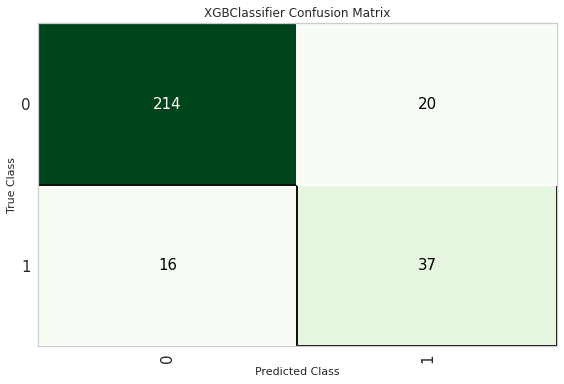

In [20]:
plot_model(xgboost, plot = 'confusion_matrix')

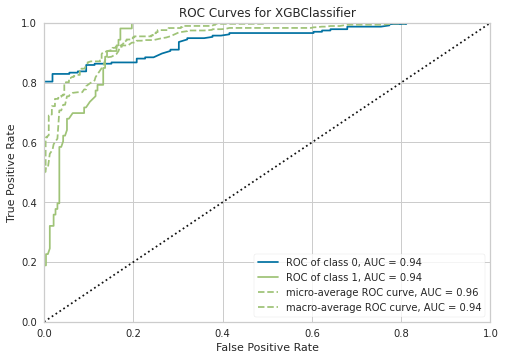

In [21]:
plot_model(xgboost)

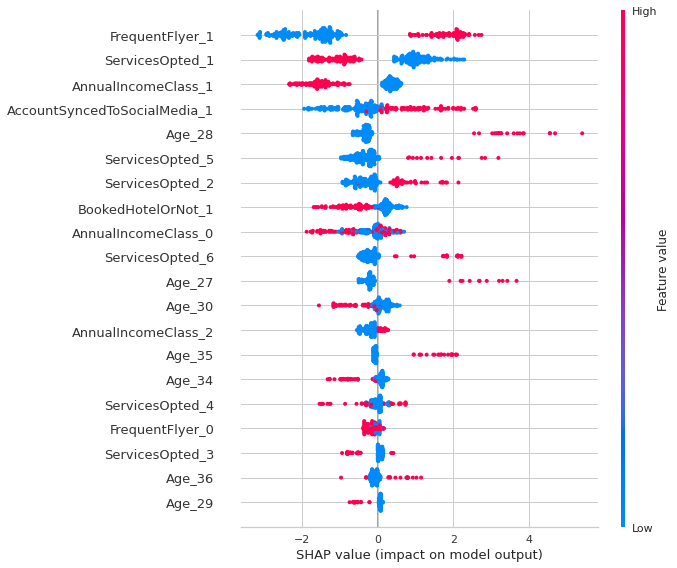

In [22]:
interpret_model(xgboost)

In [23]:
interpret_model(xgboost, plot = 'reason', observation = 5)

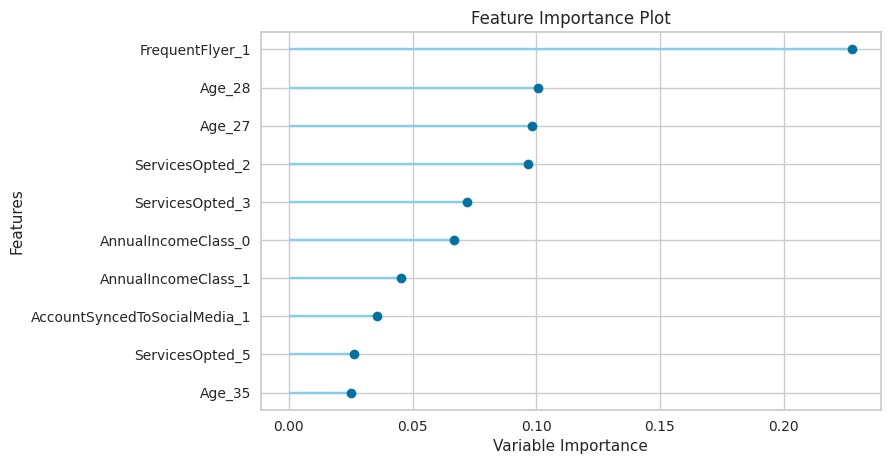

In [24]:
plot_model(xgboost, plot='feature')

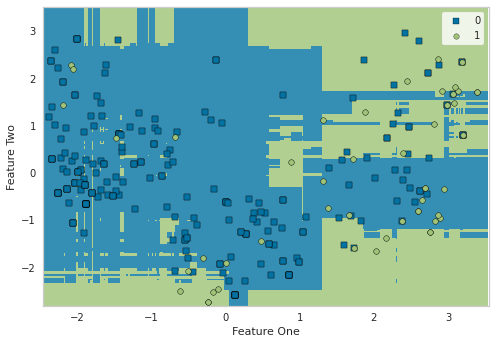

In [25]:
plot_model(xgboost, plot='boundary')